# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

#### 3. Create a DataFrame with the features and target

#### 4. Plot a scatterplot with the data

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [10]:
from scipy.io import loadmat
import pandas as pd
import seaborn as sns

In [2]:
mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [6]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [8]:
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


In [9]:
df['y'].value_counts(normalize='true')

1    0.556199
0    0.443801
Name: y, dtype: float64

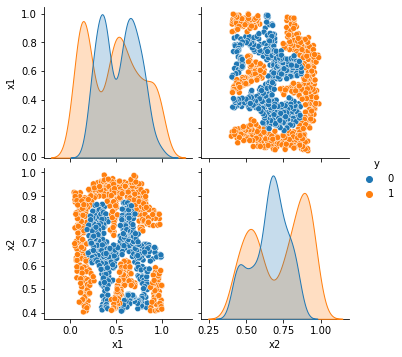

In [11]:
sns.pairplot(df, hue="y")

<AxesSubplot:>

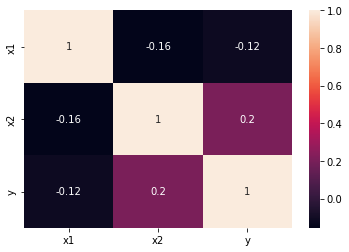

In [12]:
sns.heatmap(df.corr(), annot=True)

#### 3. Plot a scatterplot with the data

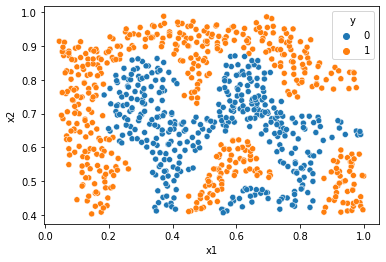

In [15]:
sns.scatterplot(data=df, x='x1', y='x2', hue="y");

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [17]:
from sklearn.svm import SVC

svc = SVC(C=100, gamma=10, probability=True)

In [19]:
X = df[['x1','x2']]
y = df['y']

#### 5. Fit the classifier and get the score

In [20]:
svc.fit(X,y)
svc.score(X,y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [26]:
y_pred_proba = svc.predict_proba(X)
y_pred_proba[:,0]

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 8.46657853e-07,
       6.01783584e-03, 2.66272166e-03, 1.09941089e-07, 1.10645396e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.29235633e-02,
       1.18410275e-11, 3.00000090e-14, 3.00000090e-14, 5.35413609e-10,
       2.60148560e-01, 5.92786674e-01, 3.61953980e-14, 3.00000090e-14,
       1.50917923e-02, 1.24278607e-05, 9.06531541e-03, 1.27612323e-01,
       1.91829322e-02, 2.61336048e-06, 1.30998292e-06, 3.02074131e-07,
       3.80268232e-06, 2.39480203e-02, 1.68127138e-01, 2.94133386e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 4.72111890e-13, 4.45110918e-10, 5.97593077e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.95535352e-10,
       1.14251968e-13, 3.00000090e-14, 6.11185315e-09, 2.06422201e-07,
       1.22619606e-05, 1.38633452e-13, 3.00000090e-14, 3.00000090e-14,
      

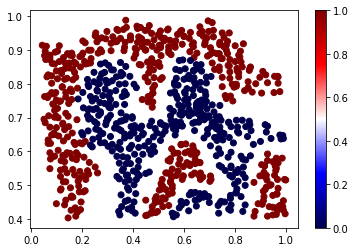

In [30]:
plt.scatter(df['x1'], df['x2'], c = y, cmap="seismic")
plt.colorbar()

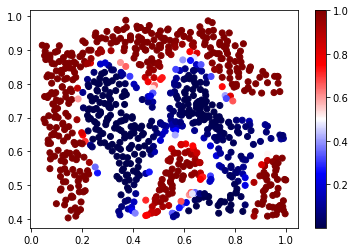

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")
plt.colorbar()

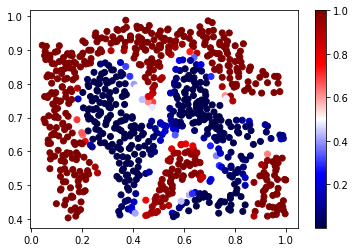

In [34]:

svc = SVC(C=1000, gamma=10, probability=True)
svc.fit(X,y)
y_pred_proba = svc.predict_proba(X)

plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")
plt.colorbar()


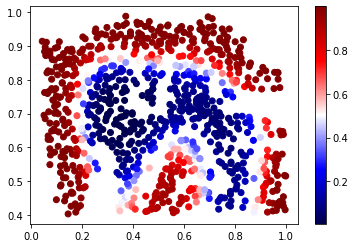

In [35]:

svc = SVC(C=1, gamma=10, probability=True)
svc.fit(X,y)
y_pred_proba = svc.predict_proba(X)

plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")
plt.colorbar()